# Домашняя работа к уроку 7

## Введение в высшую математику

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Решите линейную систему:
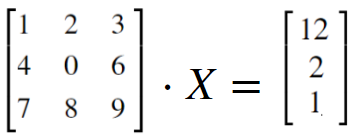

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
D = np.linalg.det(A)
print(D)
B = np.array([12, 2, 1])
X = np.linalg.solve(A, B)
print(X)

59.999999999999986
[-9.2         0.9         6.46666667]


### Задание 2

Найдите псевдорешение:

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15

В работе. Будет чуть позже.